# PROJECT OVERVIEW

The New York City Taxi and Limousine Commission seeks a way to utilize the data to predict the fare amount optimally based on relevant variables to ensure best customer experience. This project focuses on developing a predictive model to determine the fare amount for taxi cab rides in New York City area based on data collected by The New York City Taxi and Limousine Commission. 

# Scenario

The New York City Taxi and Limousine Commission (TLC) data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. To ensure both taxi driver and customer satisfaction and to reduce hassle, this project aims to develop a regression/ML model that helps estimate taxi fares before the ride, based on data that TLC has gathered.

In order to tackle this situation the taxi trip data should be analyzed through exploratory data analysis(EDA),A/B tested before constructing any regression/ML model. It will help TLC to optimise fare pricing and also help them to run their operation smoothly. 

### Problem

Estimating optimal taxi fares before the ride to promote customer-friendly practices.\ Question to be answered: What's the best the estimation of taxi fares based on relevant variables?

### Response

Since the variable to be predicted is continuous, a linear regression or tree-based machine learning model will be used.

### Impact 

TLC can improve their operations based on the insights and also fair pricing will improve customer satisfaction.

# Business task/purpose

To develop a predictive model that accurately estimates New York City taxi fares before rides using relevant data variables, enabling optimal pricing, enhancing customer satisfaction through transparent fares, and improving operational efficiency for the Taxi and Limousine Commission.

## Data source

1. The taxi Trip Data is stored in single csv file, can be accessed through - https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs/about_data

2. The dataset possesses the qualities of 'ROCCC'.

## Data Fields

The dataset contains:
408,294 rows – each row represents a different trip

18 columns

|Column name | Description |
|---|---|
|ID | Trip identification number |  
|VendorID | A code indicating the TPEP provider that provided the record.  
|         |  **1= Creative Mobile Technologies, LLC**; 
|         |  **2= VeriFone Inc.** |
|tpep_pickup_datetime | The date and time when the meter was engaged. |
|tpep_dropoff_datetime | The date and time when the meter was disengaged. |
|Passenger_count | The number of passengers in the vehicle.  
| |This is a driver-entered value.|
|Trip_distance |The elapsed trip distance in miles reported by the taximeter. |
|PULocationID | TLC Taxi Zone in which the taximeter was engaged |
|DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID | The final rate code in effect at the end of the trip. 
|           | **1= Standard rate**
|           | **2=JFK**
|           | **3=Newark** 
|           | **4=Nassau or Westchester**
|           | **5=Negotiated fare**
|           | **6=Group ride**|
|Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle 
| |memory before being sent to the vendor, aka “store and forward,”
| |because the vehicle did not have a connection to the server. 
| |**Y= store and forward trip**
| |**N= not a store and forward trip**|
|Payment_type | A numeric code signifying how the passenger paid for the trip.  
| |**1= Credit card** 
| |**2= Cash** 
| |**3= No charge** 
| |**4= Dispute** 
| |**5= Unknown** 
| |**6= Voided trip** |
|Fare_amount |The time-and-distance fare calculated by the meter.|
|Extra |Miscellaneous extras and surcharges. Currently, this only includes
| | the \\$0.50 and \\$1 rush hour and overnight charges.|
|MTA_tax |\\\$ 0.50  MTA tax that is automatically triggered based on the metered
| |  rate in use|
|Improvement_surcharge | $0.30 improvement surcharge assessed trips at the flag drop.
| | The  improvement surcharge began being levied in 2015.|
|Tip_amount | Tip amount – This field is automatically populated for credit card tips. 
| | Cash tips are not included.|
|Tolls_amount | Total amount of all tolls paid in trip. |
|Total_amount | The total amount charged to passengers. Does not include cash tips. |



# Import
* Set up environment
* Load Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import plot_tree
import plotly.subplots as sp

pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

In [2]:
df0 = pd.read_csv('/kaggle/input/2017-yellow-taxi-trip-data/2017_Yellow_Taxi_Trip_Data.csv')
df0

Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0        24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1        35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3        38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4        30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
...           ...       ...                     ...                     ...   
22694    14873857         2   02/24/2017 5:37:23 PM   02/24/2017 5:40:39 PM   
22695    66632549         2   08/06/2017 4:43:59 PM   08/06/2017 5:24:47 PM   
22696    74239933         2   09/04/2017 2:54:14 PM   09/04/2017 2:58:22 PM   
22697    60217333         2  07/15/2017 12:56:30 PM   07/15/2017 1:08:26 PM   
22698    17208911         1   03/02/2017 1:02:49 PM   03/02/2017 1:16:09 PM   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    6           3.34           1                  N   
1                    1           1.80           1                  N   
2                    1           1.00           1                  N   
3                    1           3.70           1                  N   
4                    1           4.37           1                  N   
...                ...            ...         ...                ...   
22694                3           0.61           1                  N   
22695                1          16.71           2                  N   
22696                1           0.42           1                  N   
22697                1           2.36           1                  N   
22698                1           2.10           1                  N   

       PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0               100           231             1         13.0    0.0      0.5   
1               186            43             1         16.0    0.0      0.5   
2               262           236             1          6.5    0.0      0.5   
3               188            97             1         20.5    0.0      0.5   
4                 4           112             2         16.5    0.5      0.5   
...             ...           ...           ...          ...    ...      ...   
22694            48           186             2          4.0    1.0      0.5   
22695           132           164             1         52.0    0.0      0.5   
22696           107           234             2          4.5    0.0      0.5   
22697            68           144             1         10.5    0.0      0.5   
22698           239           236             1         11.0    0.0      0.5   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  
0            2.76          0.00                    0.3         16.56  
1            4.00          0.00                    0.3         20.80  
2            1.45          0.00                    0.3          8.75  
3            6.39          0.00                    0.3         27.69  
4            0.00          0.00                    0.3         17.80  
...           ...           ...                    ...           ...  
22694        0.00          0.00                    0.3          5.80  
22695       14.64          5.76                    0.3         73.20  
22696        0.00          0.00                    0.3          5.30  
22697        1.70          0.00                    0.3         13.00  
22698        2.35          0.00                    0.3         14.15  

[22699 rows x 18 columns]

# Exploratory data analysis(EDA)

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is no missing data according to the results from the info() function.

In [4]:
df0.describe()

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000   -120.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   
50%        1.000000    162.000000    162.000000      1.000000      9.500000   
75%        1.000000    233.000000    233.000000      2.000000     14.500000   
max       99.000000    265.000000    265.000000      4.000000    999.990000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000   
mean       0.333275      0.497445      1.835781      0.312542   
std        0.463097      0.039465      2.800626      1.399212   
min       -1.000000     -0.500000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.000000   
50%        0.000000      0.500000      1.350000      0.000000   
75%        0.500000      0.500000      2.450000      0.000000   
max        4.500000      0.500000    200.000000     19.100000   

       improvement_surcharge  total_amount  
count           22699.000000  22699.000000  
mean                0.299551     16.310502  
std                 0.015673     16.097295  
min                -0.300000   -120.300000  
25%                 0.300000      8.750000  
50%                 0.300000     11.800000  
75%                 0.300000     17.800000  
max                 0.300000   1200.290000

In [5]:
import datetime as dt

df0['tpep_pickup_datetime']=pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime']=pd.to_datetime(df0['tpep_dropoff_datetime'])

In [6]:
df0.duplicated().sum()

0

In [7]:
fig = px.box(df0, x='trip_distance')
fig.update_layout(title='Boxplot of Trip distance')
fig.show()


In [8]:
fig = px.histogram(df0, x='trip_distance', barmode='group', opacity=0.8)
fig.update_layout(title='Trip distance histogram')
fig.show()

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

In [9]:
fig = px.box(df0, x='total_amount')
fig.update_layout(title='Boxplot of total amount')
fig.show()


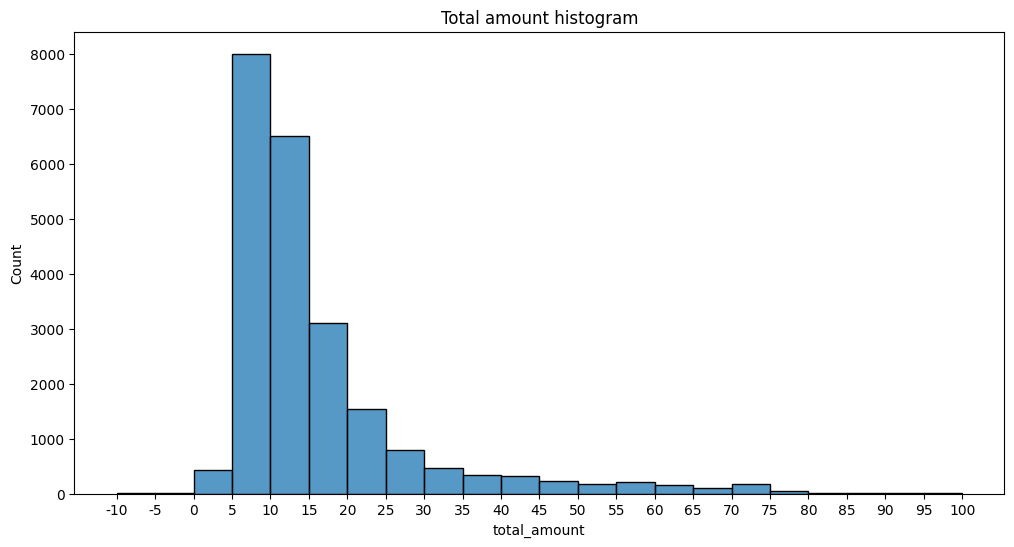

In [10]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
ax = sns.histplot(df0['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

 The total cost of each trip also has a distribution that skews right, with most costs falling in the \$5-15 range.

In [11]:
fig = px.box(df0, x='tip_amount')
fig.update_layout(title='Boxplot of tip amount')
fig.show()


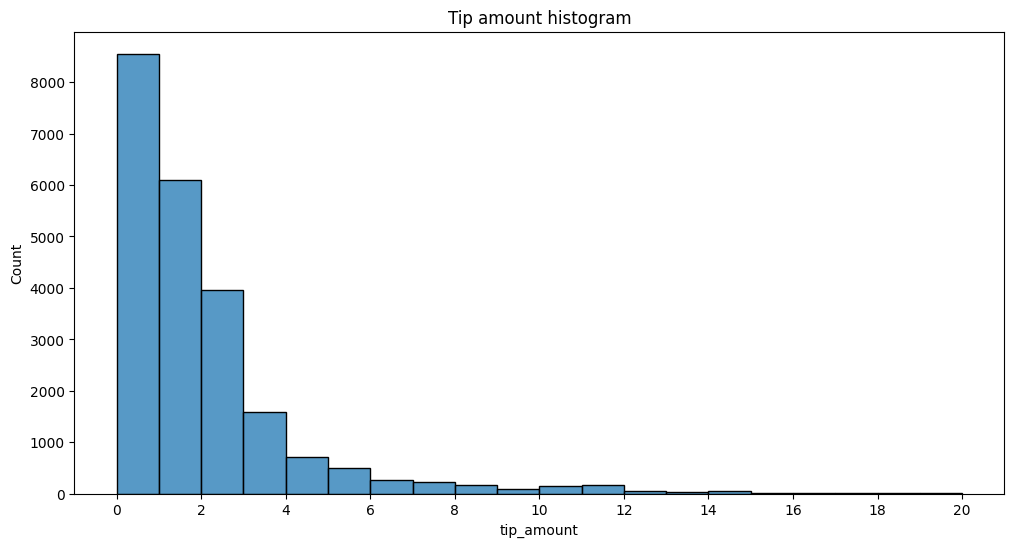

In [12]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df0['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

The distribution for tip amount is right-skewed, with nearly all the tips in the \$0-3 range.

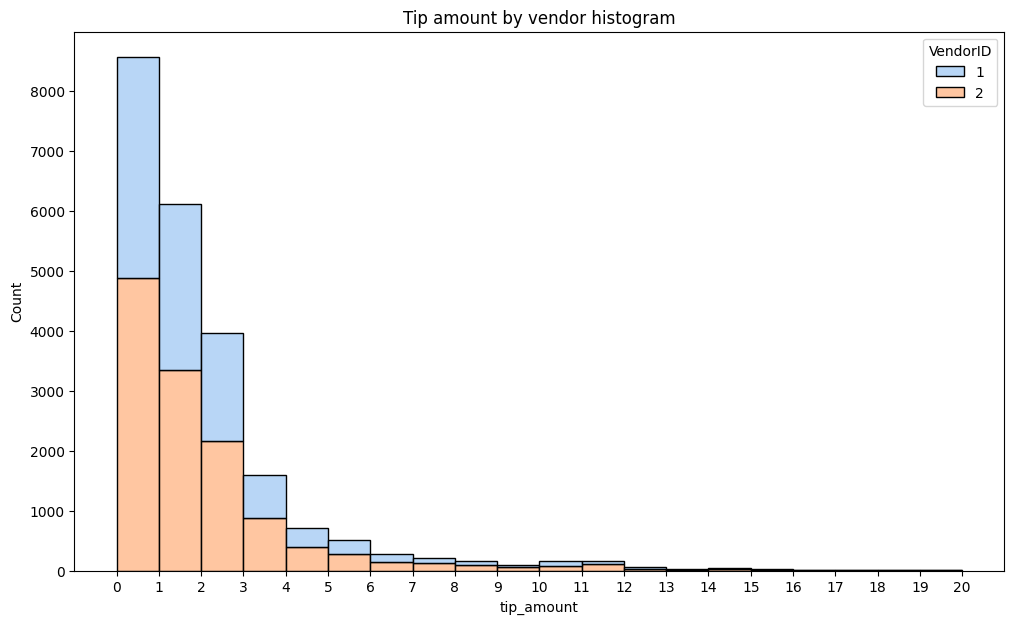

In [13]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df0, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

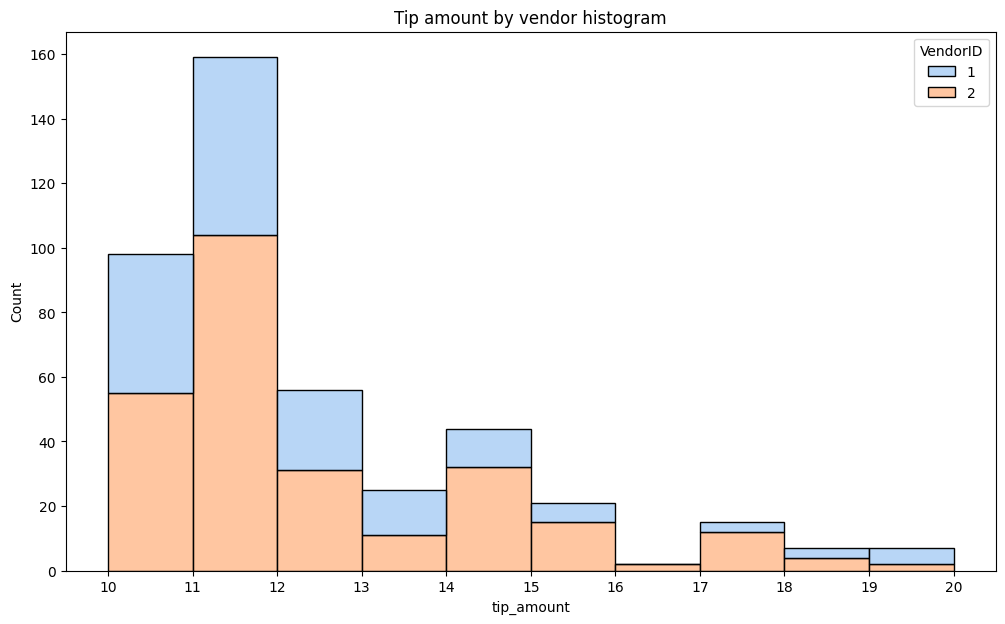

In [14]:
tips_over_ten = df0[df0['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

 The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

In [15]:
df0['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [16]:
value_counts = df0['passenger_count'].value_counts()
labels = ['1', '2', '5', '3', '6', '4', '0']

fig = px.pie(values=value_counts.values, names=labels, title='Percentages of passenger count' )
fig.show()

Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [17]:

mean_tips_by_passenger_count = df0.groupby(['passenger_count']).mean(numeric_only = True)[['tip_amount']]
mean_tips_by_passenger_count

tip_amount
passenger_count            
0                  2.135758
1                  1.848920
2                  1.856378
3                  1.716768
4                  1.530264
5                  1.873185
6                  1.720260

In [18]:
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

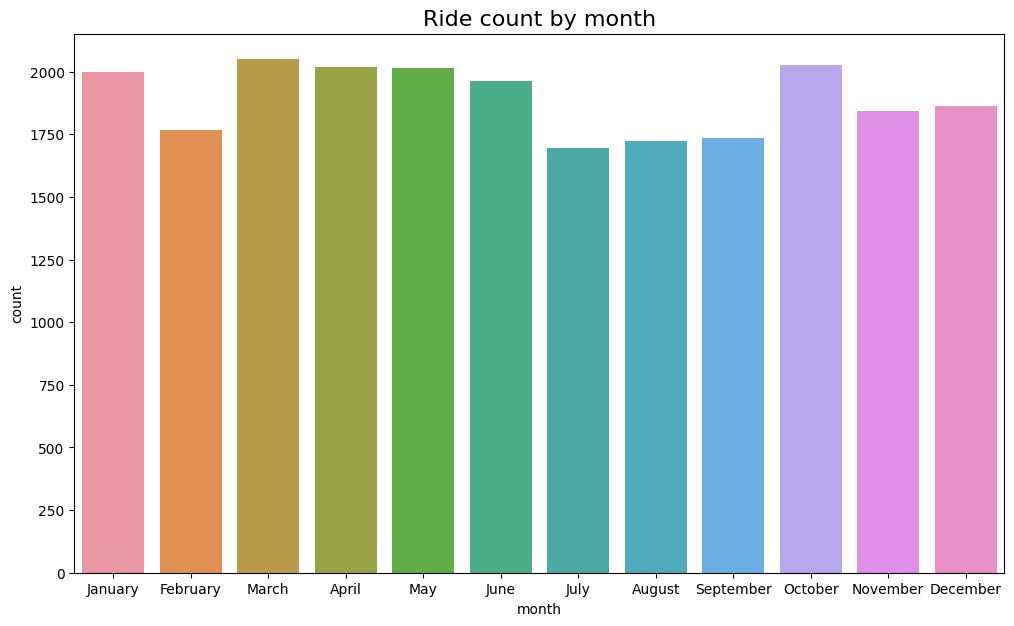

In [19]:
monthly_rides = df0['month'].value_counts()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)


plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

 Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

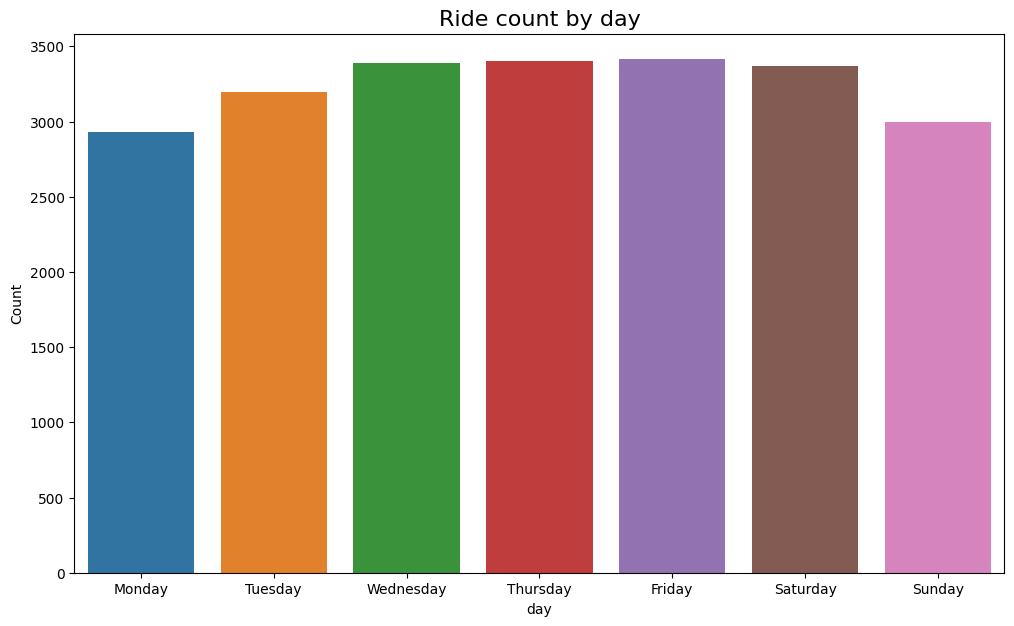

In [20]:
daily_rides = df0['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

### total revenue by day of the week

In [21]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df0.groupby('day').sum(numeric_only = True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

total_amount
day                    
Monday         49574.37
Tuesday        52527.14
Wednesday      55310.47
Thursday       57181.91
Friday         55818.74
Saturday       51195.40
Sunday         48624.06

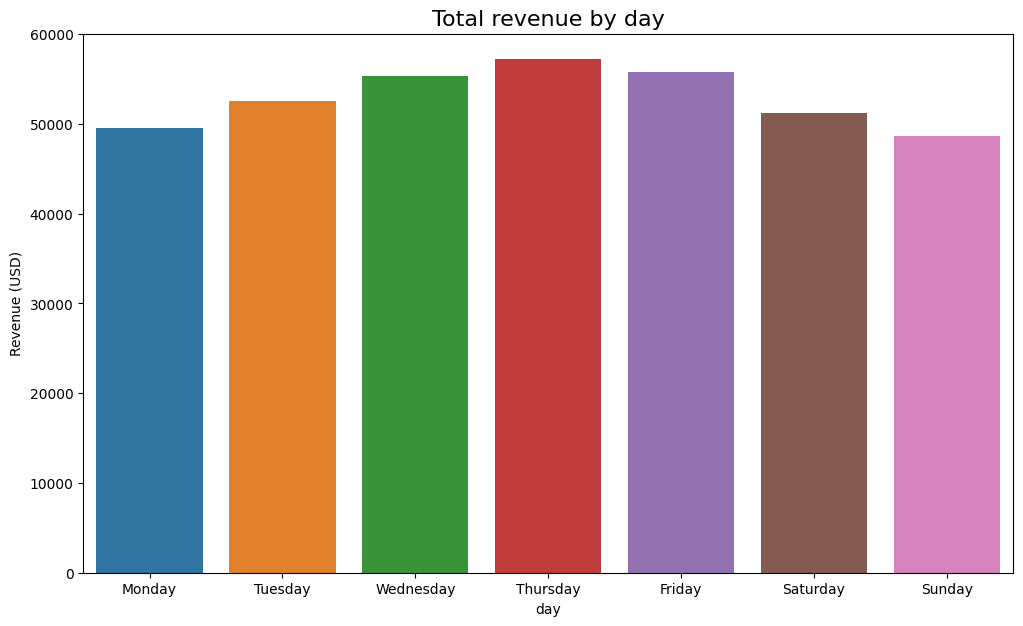

In [22]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

In [23]:
total_amount_month = df0.groupby('month').sum(numeric_only = True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

total_amount
month                  
January        31735.25
February       28937.89
March          33085.89
April          32012.54
May            33828.58
June           32920.52
July           26617.64
August         27759.56
September      28206.38
October        33065.83
November       30800.44
December       31261.57

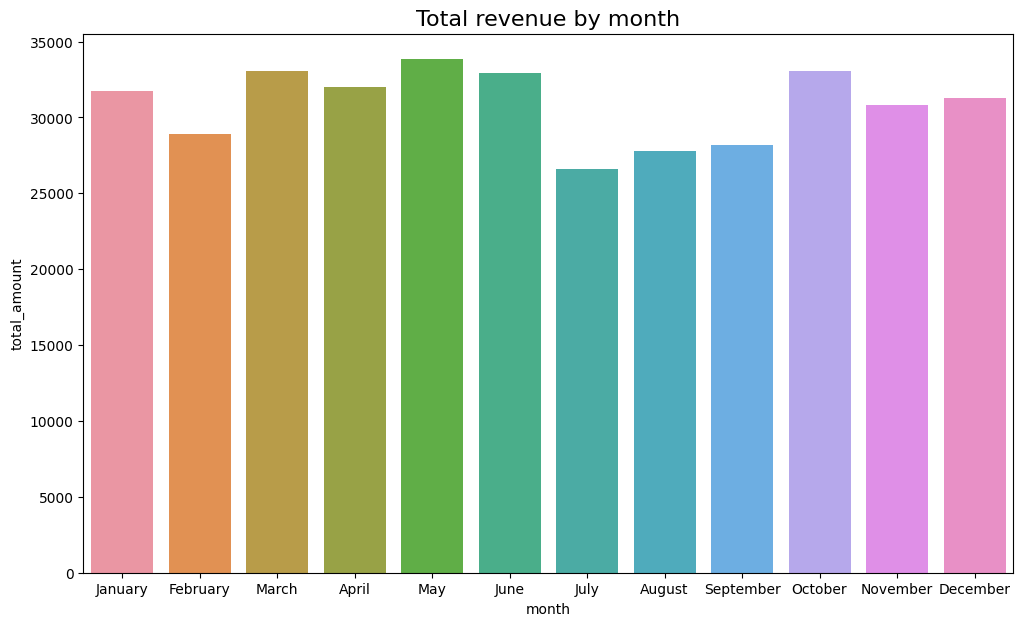

In [24]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

 Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

In [25]:
df0['trip_duration'] = (df0['tpep_dropoff_datetime']-df0['tpep_pickup_datetime'])
df0.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount     month  \
0        2.76           0.0                    0.3         16.56     March   
1        4.00           0.0                    0.3         20.80     April   
2        1.45           0.0                    0.3          8.75  December   
3        6.39           0.0                    0.3         27.69       May   
4        0.00           0.0                    0.3         17.80     April   

        day   trip_duration  
0  Saturday 0 days 00:14:04  
1   Tuesday 0 days 00:26:30  
2    Friday 0 days 00:07:12  
3    Sunday 0 days 00:30:15  
4  Saturday 0 days 00:16:43

# Insights

* The highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. 
* There are no missing values.
* There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

# A/B test

**The purpose** of this A/B test is to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, it is assumed that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: Inspection of if customers who use credit cards pay higher fare amounts than customers who use cash.

**The goal of this hypothesis test is to conduct a two-sample t-test.The steps for conducting a hypothesis test:**
* State the null hypothesis and the alternative hypothesis
* Choose a signficance level
* Find the p-value 
* Reject or fail to reject the null hypothesis 

**Null hypothesis($H_{0}$): There is no difference in average fare between customers who use credit cards and customers who use cash.**

**Alternative hypothesis($H_{A}$): There is a difference in average fare between customers who use credit cards and customers who use cash**
 
 
 we choose 5% as the significance level and proceed with a two-sample t-test.



#  Imports

In [26]:
from scipy import stats

In [27]:
df1 = df0.copy()

In [28]:
df1.describe(include='all')

Unnamed: 0      VendorID           tpep_pickup_datetime  \
count   2.269900e+04  22699.000000                          22699   
unique           NaN           NaN                            NaN   
top              NaN           NaN                            NaN   
freq             NaN           NaN                            NaN   
mean    5.675849e+07      1.556236  2017-06-29 07:32:48.973126656   
min     1.212700e+04      1.000000            2017-01-01 00:08:25   
25%     2.852056e+07      1.000000     2017-03-30 03:09:38.500000   
50%     5.673150e+07      2.000000            2017-06-23 12:35:57   
75%     8.537452e+07      2.000000            2017-10-02 10:34:34   
max     1.134863e+08      2.000000            2017-12-31 23:45:30   
std     3.274493e+07      0.496838                            NaN   

                tpep_dropoff_datetime  passenger_count  trip_distance  \
count                           22699     22699.000000   22699.000000   
unique                            NaN              NaN            NaN   
top                               NaN              NaN            NaN   
freq                              NaN              NaN            NaN   
mean    2017-06-29 07:49:49.799726848         1.642319       2.913313   
min               2017-01-01 00:17:20         0.000000       0.000000   
25%        2017-03-30 03:11:20.500000         1.000000       0.990000   
50%               2017-06-23 12:55:11         1.000000       1.610000   
75%               2017-10-02 10:53:47         2.000000       3.060000   
max               2017-12-31 23:49:24         6.000000      33.960000   
std                               NaN         1.285231       3.653171   

          RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
count   22699.000000              22699  22699.000000  22699.000000   
unique           NaN                  2           NaN           NaN   
top              NaN                  N           NaN           NaN   
freq             NaN              22600           NaN           NaN   
mean        1.043394                NaN    162.412353    161.527997   
min         1.000000                NaN      1.000000      1.000000   
25%         1.000000                NaN    114.000000    112.000000   
50%         1.000000                NaN    162.000000    162.000000   
75%         1.000000                NaN    233.000000    233.000000   
max        99.000000                NaN    265.000000    265.000000   
std         0.708391                NaN     66.633373     70.139691   

        payment_type   fare_amount         extra       mta_tax    tip_amount  \
count   22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.336887     13.026629      0.333275      0.497445      1.835781   
min         1.000000   -120.000000     -1.000000     -0.500000      0.000000   
25%         1.000000      6.500000      0.000000      0.500000      0.000000   
50%         1.000000      9.500000      0.000000      0.500000      1.350000   
75%         2.000000     14.500000      0.500000      0.500000      2.450000   
max         4.000000    999.990000      4.500000      0.500000    200.000000   
std         0.496211     13.243791      0.463097      0.039465      2.800626   

        tolls_amount  improvement_surcharge  total_amount  month     day  \
count   22699.000000           22699.000000  22699.000000  22699   22699   
unique           NaN                    NaN           NaN     12       7   
top              NaN                    NaN           NaN  March  Friday   
freq             NaN                    NaN           NaN   2049    3413   
mean        0.312542               0.299551     16.310502    NaN     NaN   
min         0.000000              

In [29]:
df1.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount.

In [30]:
#significance level

credit_card = df1[df1['payment_type'] == 1]['fare_amount']
cash = df1[df1['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

Since the p-value is significantly smaller than the significance level of 5%, you reject the null hypothesis.

**There is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.**

# Insights

1.   The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers. 

2.   The project assumes that passengers were obligated to pay, and once informed, they complied. However, the data was not collected with this assumption in mind. To perform an A/B test, data entries were randomly grouped, which does not account for other potential explanations. For instance, riders might prefer using credit cards for longer or more expensive trips due to convenience or lack of cash on hand. In other words, the fare amount likely determines the payment type, rather than the other way around.

# Building a multiple linear regression model

# Imports

In [31]:
from datetime import datetime
from datetime import date
from datetime import timedelta


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [32]:
 df1 = df1.drop('trip_duration', axis=1)

In [33]:
df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [34]:

fig = go.Figure()

fig.add_trace(go.Box(y=df1['trip_distance'], name='Trip Distance'))
fig.add_trace(go.Box(y=df1['fare_amount'], name='Fare Amount'))
fig.add_trace(go.Box(y=df1['duration'], name='Duration'))

fig.update_layout(title='Boxplots for outlier detection', showlegend=False)
fig.show()


All three variables contain outliers. Some are extreme, but others not so much.

In [35]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df1['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculating the count of rides where the trip_distance is zero.

In [36]:
sum(df1['trip_distance']==0)

148

148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the trip_distance column will remain untouched with regard to outliers.

The range of values in the fare_amount column is large and the extremes don't make much sense.

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8. The standard formula of Q3 + (1.5 * IQR) yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $62.50.

Imputing values less than $0 with 0

In [37]:
df1.loc[df1['fare_amount'] < 0, 'fare_amount'] = 0
df1['fare_amount'].min()

0.0

In [38]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df1.loc[df1[col] > upper_threshold, col] = upper_threshold
        print(df1[col].describe())
        print()

In [39]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [40]:
df1['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The 'duration' column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with 0.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: Q3 + (6 * IQR).

In [41]:
df1.loc[df1['duration'] < 0, 'duration'] = 0
df1['duration'].min()

0.0

In [42]:
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



# Feature engineering

In [43]:
df2 = df1.copy()

In [44]:
df2['pickup_dropoff'] = df2['PULocationID'].astype(str) + ' ' + df2['DOLocationID'].astype(str)
df2['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [45]:
grouped = df2.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

trip_distance
pickup_dropoff               
1 1                  2.433333
10 148              15.700000
100 1               16.890000
100 100              0.253333
100 107              1.180000

In [46]:
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']

In [47]:
df2['mean_distance'] = df2['pickup_dropoff']
df2['mean_distance'] = df2['mean_distance'].map(grouped_dict)
df2[(df2['PULocationID']==100) & (df2['DOLocationID']==231)][['mean_distance']]

mean_distance
0           3.521667
4909        3.521667
16636       3.521667
18134       3.521667
19761       3.521667
20581       3.521667

`mean_distance`  captures the mean distance for each group of trips that share pickup and dropoff points.

In [48]:
grouped = df2.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df2['mean_duration'] = df2['pickup_dropoff']
df2['mean_duration'] = df2['mean_duration'].map(grouped_dict)

df2[(df2['PULocationID']==100) & (df2['DOLocationID']==231)][['mean_duration']]

mean_duration
0          22.847222
4909       22.847222
16636      22.847222
18134      22.847222
19761      22.847222
20581      22.847222

#### Creating `rush_hour` column

Defined rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Creating a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [49]:
df2['rush_hour'] = df2['tpep_pickup_datetime'].dt.hour


In [50]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [51]:
df2['rush_hour'] = df2.apply(rush_hourizer, axis=1)
df2.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount     month  \
0        2.76           0.0                    0.3         16.56     March   
1        4.00           0.0                    0.3         20.80     April   
2        1.45           0.0                    0.3          8.75  December   
3        6.39           0.0                    0.3         27.69       May   
4        0.00           0.0                    0.3         17.80     April   

        day   duration pickup_dropoff  mean_distance  mean_duration  rush_hour  
0  Saturday  14.066667        100 231       3.521667      22.847222          1  
1   Tuesday  26.500000         186 43       3.108889      24.470370          0  
2    Friday   7.200000        262 236       0.881429       7.250000          1  
3    Sunday  30.250000         188 97       3.700000      30.250000          0  
4  Saturday  16.716667          4 112       4.435000      14.616667          0

In [52]:
fig = px.scatter(df2, x='mean_duration', y='fare_amount', trendline='ols', trendline_color_override='red')
fig.update_traces(marker=dict(opacity=0.5, size=5))
fig.update_layout(title='Mean duration x fare amount')
fig.show()


The mean_duration variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

We know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of $62.50. What is the other line?

In [53]:
df2[df2['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [54]:
df2[df2['fare_amount']==52].head(30)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
11      18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   
110     47959795         1  2017-06-03 14:24:57   2017-06-03 15:31:48   
161     95729204         2  2017-11-11 20:16:16   2017-11-11 20:17:14   
247    103404868         2  2017-12-06 23:37:08   2017-12-07 00:06:19   
379     80479432         2  2017-09-24 23:45:45   2017-09-25 00:15:14   
388     16226157         1  2017-02-28 18:30:05   2017-02-28 19:09:55   
406     55253442         2  2017-06-05 12:51:58   2017-06-05 13:07:35   
449     65900029         2  2017-08-03 22:47:14   2017-08-03 23:32:41   
468     80904240         2  2017-09-26 13:48:26   2017-09-26 14:31:17   
520     33706214         2  2017-04-23 21:34:48   2017-04-23 22:46:23   
569     99259872         2  2017-11-22 21:31:32   2017-11-22 22:00:25   
572     61050418         2  2017-07-18 13:29:06   2017-07-18 13:29:19   
586     54444647         2  2017-06-26 13:39:12   2017-06-26 14:34:54   
692     94424289         2  2017-11-07 22:15:00   2017-11-07 22:45:32   
717    103094220         1  2017-12-06 05:19:50   2017-12-06 05:53:52   
719     66115834         1  2017-08-04 17:53:34   2017-08-04 18:50:56   
782     55934137         2  2017-06-09 09:31:25   2017-06-09 10:24:10   
816     13731926         2  2017-02-21 06:11:03   2017-02-21 06:59:39   
818     52277743         2  2017-06-20 08:15:18   2017-06-20 10:24:37   
835      2684305         2  2017-01-10 22:29:47   2017-01-10 23:06:46   
840     90860814         2  2017-10-27 21:50:00   2017-10-27 22:35:04   
861    106575186         1  2017-12-16 06:39:59   2017-12-16 07:07:59   
881    110495611         2  2017-12-30 05:25:29   2017-12-30 06:01:29   
958     87017503         1  2017-10-15 22:39:12   2017-10-15 23:14:22   
970     12762608         2  2017-02-17 20:39:42   2017-02-17 21:13:29   
984     71264442         1  2017-08-23 18:23:26   2017-08-23 19:18:29   
1082    11006300         2  2017-02-07 17:20:19   2017-02-07 17:34:41   
1097    68882036         2  2017-08-14 23:01:15   2017-08-14 23:03:35   
1110    74720333         1  2017-09-06 10:46:17   2017-09-06 11:44:41   
1179    51937907         2  2017-06-19 06:23:13   2017-06-19 07:03:53   

      passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
11                  2          18.90           2                  N   
110                 1          18.00           2                  N   
161                 1           0.23           2                  N   
247                 1          18.93           2                  N   
379                 1          17.99           2                  N   
388                 1          18.40           2                  N   
406                 1           4.73           2                  N   
449                 2          18.21           2                  N   
468                 1          17.27           2                  N   
520                 6          18.34           2                  N   
569                 1          18.65           2                  N   
572                 1           0.00           2                  N   
586                 1          17.76           2                  N   
692                 2          16.97           2                  N   
717                 1          20.80           2                  N   
719                 1          21.60           2                  N   
782                 2          18.81           2                  N   
816                 5          16.94           2                  N   
818                 1          17.77           2                  N   
835                 1          18.57           2                  N   
840                 1          22.43           2                  N   
861                 2          17.80           2                  N   
881                 6          18.23           2                  N   
958                 1          21.80  

It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

In [55]:
df3 = df2.copy()

In [56]:
df3 = df3.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [58]:
fig = px.scatter_matrix(df3[['fare_amount', 'mean_duration', 'mean_distance']], opacity=0.4, dimensions=['fare_amount', 'mean_duration', 'mean_distance'])
fig.show()


In [59]:
df3.corr(method='pearson')

VendorID  passenger_count  fare_amount  mean_distance  \
VendorID         1.000000         0.266463     0.001045       0.004741   
passenger_count  0.266463         1.000000     0.014942       0.013428   
fare_amount      0.001045         0.014942     1.000000       0.910185   
mean_distance    0.004741         0.013428     0.910185       1.000000   
mean_duration    0.001876         0.015852     0.859105       0.874864   
rush_hour       -0.006550        -0.011076    -0.015012      -0.028227   

                 mean_duration  rush_hour  
VendorID              0.001876  -0.006550  
passenger_count       0.015852  -0.011076  
fare_amount           0.859105  -0.015012  
mean_distance         0.874864  -0.028227  
mean_duration         1.000000  -0.016576  
rush_hour            -0.016576   1.000000

In [60]:
fig = px.imshow(df3.corr(method='pearson'), color_continuous_scale='Reds', text_auto=True)
fig.update_layout(title='Correlation heatmap', title_font_size=18)
fig.show()


mean_duration and mean_distance are both highly correlated with the target variable of fare_amount They're also both correlated with each other, with a Pearson correlation of 0.87.

However, highly correlated predictor variables can be bad for linear regression models when we want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict fare_amount, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

### Spliting data into outcome variable and features

In [61]:
X = df3.drop(columns=['fare_amount'])


y = df3[['fare_amount']]



### Pre-processing data

In [62]:
#Dummy encode categorical variables
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, drop_first=True)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [65]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluating model

In [66]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8486938165561406
R^2: 0.8486938165561406
MAE: 2.1845115115596996
MSE: 17.100511617573986
RMSE: 4.135276486230877


In [67]:
X_test_scaled = scaler.transform(X_test)

In [68]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.830480678142155
R^2: 0.830480678142155
MAE: 2.1280654158518604
MSE: 17.521569486769497
RMSE: 4.18587738553932


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R2 of 0.83 means that 83% of the variance in the fare_amount variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of 2 is not more than twice as bad as an error of one.

In [69]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
9199     12.5   9.612701  2.887299
4955      6.0   8.503939 -2.503939
16833    12.0   9.200482  2.799518
13244    20.5  20.644460 -0.144460
1063     14.0  15.346152 -1.346152

In [70]:
fig = px.scatter(results, x='actual', y='predicted', title='Actual vs. Predicted', opacity=0.5, trendline='ols', trendline_color_override='red')
fig.add_shape(type='line', x0=0, y0=0, x1=60, y1=60, line=dict(color='red', width=2))
fig.show()

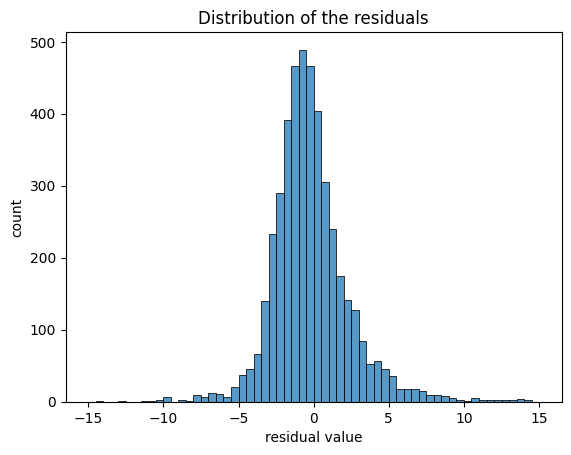

In [71]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [72]:
results['residual'].mean()

0.05259444912650554

The distribution of the residuals is approximately normal and has a mean of 0.052. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

In [73]:
fig = px.scatter(results, x='predicted', y='residual', title='Scatterplot of residuals over predicted values')
fig.add_shape(type='line', x0=results['predicted'].min(), y0=0, x1=results['predicted'].max(), y1=0, line=dict(color='red'))
fig.update_xaxes(title='predicted value')
fig.update_yaxes(title='residual value')
fig.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

In [74]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

passenger_count  mean_distance  mean_duration  rush_hour  VendorID_2
0         0.011984       7.212406        2.84336   0.080809   -0.030639

The coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction. A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \\$7.21. This is incorrect, the data used to train the model was standardized with StandardScaler(). As such, the units are no longer miles. In other words, we cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of \\$7.21.

Note that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data).

* Calculate the standard deviation of mean_distance in the X_train data.

* Divide the coefficient (7.212406) by the result to yield a more intuitive interpretation.

In [75]:
print(X_train['mean_distance'].std())

print(7.133867 / X_train['mean_distance'].std())

3.6013541524870534
1.9808846056068756


Now we can make a more intuitive interpretation: for every 3.60 miles traveled, the fare increased by a mean of \\$7.21. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$1.98.

When the mean_distance and mean_duration columns were computed, the means were calculated from the entire dataset. These same columns were then used to train a model that was used to predict on a test set. A test set is supposed to represent entirely new data that the model has not seen before, but in this case, some of its predictor variables were derived using data that was in the test set. This is known as data leakage. Data leakage is when information from your training data contaminates the test data. If your model has unexpectedly high scores, there is a good chance that there was some data leakage. To avoid data leakage in this modeling process, it would be best to compute the means using only the training set and then copy those into the test set, thus preventing values from the test set from being included in the computation of the means. This would have created some problems because it's very likely that some combinations of pickup-dropoff locations would only appear in the test data (not the train data). This means that there would be NaNs in the test data, and further steps would be required to address this. In this case, the data leakage improved the R2 score by ~0.03.

# Building a machine learning model

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.

**The goal** of this model is to predict whether or not a customer is a generous tipper.

### Imports

In [76]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from xgboost import plot_importance

In [77]:
nyc_preds_means = pd.read_csv('/kaggle/input/predictions-from-linear-regression/preds_linear_regression.csv')
nyc_preds_means.head()

mean_duration  mean_distance  predicted_fare
0      22.847222       3.521667       16.434245
1      24.470370       3.108889       16.052218
2       7.250000       0.881429        7.053706
3      30.250000       3.700000       18.731650
4      14.616667       4.435000       15.845642

In [78]:
df4 = df1.copy()

In [79]:
df5 = df4.merge(nyc_preds_means,
                left_index=True,
                right_index=True)

df5.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount     month  \
0        2.76           0.0                    0.3         16.56     March   
1        4.00           0.0                    0.3         20.80     April   
2        1.45           0.0                    0.3          8.75  December   
3        6.39           0.0                    0.3         27.69       May   
4        0.00           0.0                    0.3         17.80     April   

        day   duration  mean_duration  mean_distance  predicted_fare  
0  Saturday  14.066667      22.847222       3.521667       16.434245  
1   Tuesday  26.500000      24.470370       3.108889       16.052218  
2    Friday   7.200000       7.250000       0.881429        7.053706  
3    Sunday  30.250000      30.250000       3.700000       18.731650  
4  Saturday  16.716667      14.616667       4.435000       15.845642

# Feature engineering

Adding a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [80]:
df5['tip_percent'] = round(df5['tip_amount'] / (df5['total_amount'] - df5['tip_amount']), 3)

Now creating another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).
​
1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [81]:
df5['generous'] = df5['tip_percent']
df5['generous'] = (df5['generous'] >= 0.2)
df5['generous'] = df5['generous'].astype(int)

#### Creating time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [82]:
df5['am_rush'] = df5['tpep_pickup_datetime'].dt.hour
df5['daytime'] = df5['tpep_pickup_datetime'].dt.hour
df5['pm_rush'] = df5['tpep_pickup_datetime'].dt.hour
df5['nighttime'] = df5['tpep_pickup_datetime'].dt.hour

In [83]:
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [84]:
df5['am_rush'] = df5.apply(am_rush, axis=1)
df5['am_rush'].head()

0    1
1    0
2    1
3    0
4    0
Name: am_rush, dtype: int64

In [85]:
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [86]:
df5['daytime'] = df5.apply(daytime, axis=1)

In [87]:
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [88]:
df5['pm_rush'] = df5.apply(pm_rush, axis=1)

In [89]:
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [90]:
df5['nighttime'] = df5.apply(nighttime, axis=1)

In [91]:
df5.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   
3           188            97             1         20.5    0.0      0.5   
4             4           112             2         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount     month  \
0        2.76           0.0                    0.3         16.56     March   
1        4.00           0.0                    0.3         20.80     April   
2        1.45           0.0                    0.3          8.75  December   
3        6.39           0.0                    0.3         27.69       May   
4        0.00           0.0                    0.3         17.80     April   

        day   duration  mean_duration  mean_distance  predicted_fare  \
0  Saturday  14.066667      22.847222       3.521667       16.434245   
1   Tuesday  26.500000      24.470370       3.108889       16.052218   
2    Friday   7.200000       7.250000       0.881429        7.053706   
3    Sunday  30.250000      30.250000       3.700000       18.731650   
4  Saturday  16.716667      14.616667       4.435000       15.845642   

   tip_percent  generous  am_rush  daytime  pm_rush  nighttime  
0        0.200         1        1        0        0          0  
1        0.238         1        0        1        0          0  
2        0.199         0        1        0        0          0  
3        0.300         1        0        1        0          0  
4        0.000         0        0        0        0          1

In [92]:
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'store_and_fwd_flag',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'tip_percent']

df5 = df5.drop(drop_cols, axis=1)


#### Variable encoding

In [93]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   trip_distance    22699 non-null  float64
 3   RatecodeID       22699 non-null  int64  
 4   PULocationID     22699 non-null  int64  
 5   DOLocationID     22699 non-null  int64  
 6   total_amount     22699 non-null  float64
 7   month            22699 non-null  object 
 8   day              22699 non-null  object 
 9   duration         22699 non-null  float64
 10  mean_duration    22699 non-null  float64
 11  mean_distance    22699 non-null  float64
 12  predicted_fare   22699 non-null  float64
 13  generous         22699 non-null  int64  
 14  am_rush          22699 non-null  int64  
 15  daytime          22699 non-null  int64  
 16  pm_rush          22699 non-null  int64  
 17  nighttime   

In [94]:
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

for col in cols_to_str:
    df5[col] = df5[col].astype('str')

In [95]:
df6 = pd.get_dummies(df5, drop_first=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Columns: 401 entries, passenger_count to day_Wednesday
dtypes: bool(389), float64(6), int64(6)
memory usage: 10.5 MB


In [96]:
df6['generous'].value_counts(normalize=True)

generous
0    0.64602
1    0.35398
Name: proportion, dtype: float64

# Modeling

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.



In [97]:
y = df6['generous']
X = df6.drop('generous', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Random forest

In [98]:
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1',error_score='raise')

In [99]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 5min 33s, sys: 265 ms, total: 5min 34s
Wall time: 5min 35s


GridSearchCV(cv=4, error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [100]:
path = '/kaggle/working/'

In [101]:
def write_pickle(path, model_object, save_name:str):
  
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [102]:
def read_pickle(path, saved_model_name:str):
  
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [103]:
rf1.best_score_

0.8368070136854492

In [104]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [105]:
def make_results(model_name:str, model_object, metric:str):
    
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [106]:
results = make_results('RF CV', rf1, 'f1')
results

model  precision   recall        F1  accuracy
0  RF CV   0.860684  0.81425  0.836807  0.887604

In [107]:
rf_preds = rf1.best_estimator_.predict(X_test)

In [108]:
def get_test_scores(model_name:str, preds, y_test_data):
    
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [109]:
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

model  precision    recall        F1  accuracy
0    RF CV   0.860684  0.814250  0.836807  0.887604
0  RF test   0.868799  0.828251  0.848041  0.894934

# XGBoost

Try to improve scores using an XGBoost model

In [110]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'learning_rate': [0.01, 0.1],
             'max_depth': [6, 8, 10],
             'min_child_weight': [2, 4, 6],
             'n_estimators': [300, 500]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [111]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 1h 25min 33s, sys: 14.9 s, total: 1h 25min 48s
Wall time: 23min 43s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 8, 10],
                         'min_child_weight': [2, 4, 6],
                         'n_estimators': [300, 500]},
             refit='f1', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [112]:
write_pickle(path, xgb1, 'taxi_xgb1')

In [113]:
xgb1.best_score_

0.8969149427466967

In [114]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [115]:
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

model  precision    recall        F1  accuracy
0    RF CV   0.860684  0.814250  0.836807  0.887604
0  RF test   0.868799  0.828251  0.848041  0.894934
0   XGB CV   0.897628  0.896235  0.896915  0.927089

In [116]:
xgb_preds = xgb1.best_estimator_.predict(X_test)

In [117]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

model  precision    recall        F1  accuracy
0     RF CV   0.860684  0.814250  0.836807  0.887604
0   RF test   0.868799  0.828251  0.848041  0.894934
0    XGB CV   0.897628  0.896235  0.896915  0.927089
0  XGB test   0.909661  0.902302  0.905967  0.933700

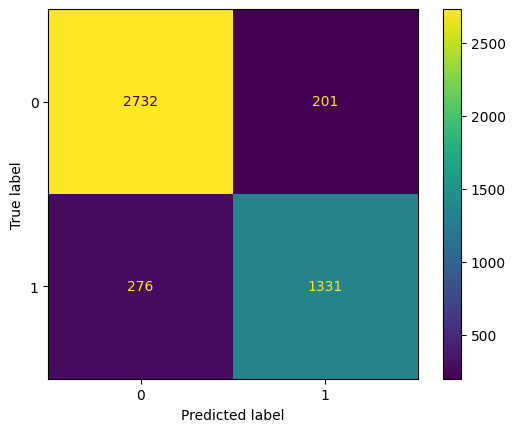

In [118]:
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Ploting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

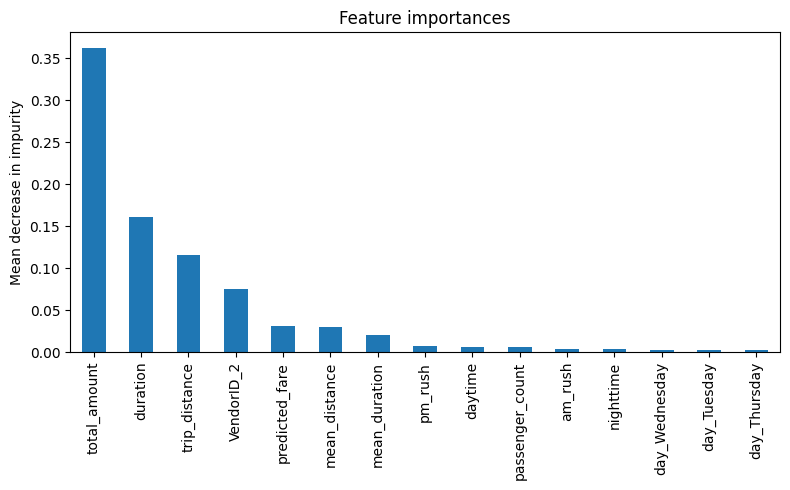

In [119]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();